
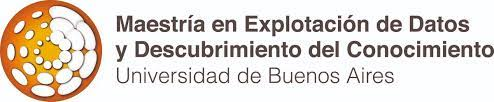


# Procesamiento de imágenes (pre TP2)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np

# Librería para manipulación de imagenes
Para operar sobre las imagenes vamos a usar la [librería de OpenCV para python](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html), que se carga como *cv2*

También existe la librería [ClustImage](https://pypi.org/project/clustimage/1.3.3/) orientada exclusivamente al clustering no supervisado de imagenes, que les puede ser útil.

## Las  imágenes son básicamente matrices
Mínimo elemento de la matriz se conoce como pixel.
Cada pixel es un dígito está entre (0,255) *(8 bits)*

![02-pixel.jpg](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASABIAAD/
2wCEABALDA4MChAODQ4SERATGCgaGBYWGDEjJR0oOjM9PDkzODdASFxOQERXRTc4UG1RV19iZ2hnPk1xeXBkeFxlZ2MBERISGBUYLxoaL2NCOEJjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY2NjY//CABEIAS0BUAMBIgACEQEDEQH/xAAyAAABBQEBAAAAAAAAAAAAAAAAAgMEBQYBBwEBAAMBAQAAAAAAAAAAAAAAAAECAwQF/9oADAMBAAIQAxAAAAB6rtKznoARHQIAdODt/ZnFbd69sSbjssQ/sEmWqN/l6qgDOnDocAOcVySToem953p1AAAAAAAAAAwtZZ1fPn0CI6tNpMxbyxka3bd4m8q62kcGuD410dG1JoKLfZ3KlCBlQ50OHeBzvJemd53p1AAAAAAAAAAwtZZ1vPnxaX4i2v4crfRwbRaXUMtjnIiqpqoNZyXv1Z+VaLZVeqyybiL3jLxtZSYUrzvIpw6CToeld53q1AAAAAAAAAAwtbZVvPmu4g6e0vtqY3uptiIh+smMQhPLdymNQbKjztmXrzu1ZbFk1zWVLYfnSPaV03LRyjtlWzzBKi35TnSY9J7zvVqAAAAAAAAABhqyzrOfOdp66drZXGTSSK8yMLecG1ispaZnp5L1cS47ZHYtqznv1yuRvNomrE2S6x2lptJc09+fgGmHpPed6tQAAAAAAAAAMNXWNfz56d6JK6LJQtUkpWkSzOSRuyBKF9RDsVyCMSJC+a2fi6SPdWIuq1WJ1ac1jAmwKSAXy9J7zvVqAAAAAAAAABha+wrefPSuwLTeyksrsUpvg+hlJKSIFtuoTFS+iCm2OkuRCtuO5ktnUb0zXAwzcbBIBMek94dWvTgdOB0CQAAAAGFrLOs587a0qbjay2XWLkL4zJx9EmCF8cSgEgiQEXspyJZkIc8+/OQ4fFpalF2L3hTSLVsSCnXK07WPTM0idJcyusMpdOd9vIAAAADC1dpWc+drc5zQ7TxC2rzHkRHprM6uOmWlhlKJ+TtEWis9CNk1AgJs7PzfWeddULkadYfIXO3C5co3cd7pzOy9+e8eo3i8XTyInQ21Jd+Rq4B7GYAAAAGGrLOt5816TNaTQ7WzKvUuay1aJ8fOW0kxKFVbPcadrZmxr7GU2nXyJZ12V1XnXZYtK/Wa5bEm12GVz6Xo5j7/AFcsd11y1USR6trW7pbrydHAPZzAAAAAw9bZVvNmXtE5osEZvQbmmOMoop9cqNFvvsVlL7b8mX478DrYL09Hp/P0VGkN9Wde3ZI2Vyn+Us0KKX4pRfNTiHMr21zTXPnS4B7WQAAAAGHrbOs5s0wZdZpaJf0nNV1TdZkt11NbSY6VCUt9mOzoEhKZDbSLDVYzVedpPjTWOqrDctHRWGl0xvGXLZ5OlK0kT04RNvc5DuMbIxp3U2RjVGwMgI15kEVs1W2VbfhbrLSv0u1EnGktLXxPY8iMgeakSgq46hl5h4ebOCtdj9j597jj/JNqVzaOMSIsSQZ8DDo6B6HIAS4haEAAPMvJcACPIj8vUxW6qLfjzMDXsa3yzmqRM56DtIxmYOyTNcjJ0yTJJ13TJGu4ZJzU8MjdWZSVSIzvJYR1QoOnFKTj0vgepxgBxDkhEMmkITzjcnAEkeRH5erY9zGf6ub0Y819AJZwDpw6c6BSYc9TPL9sXRndCdOdA4AeeehnQDnQOZnTZnl6agqpPRzTBiwmHqVUKsyiKE62zdpEdEsXiS5ClcvVW+n+b63r52auPbGOds5ETosXe5yU30Tz70FFFkddnUwtJciMpW2XU1OxxerM3LhToRvR/OPR5jFV22bMabIMbB39Bjrh0SXdc06irvYrTxpUWJAIkkR50xPrpsKakqLK5urcZfXHXz569cCiXdAxnNUFDfAQo1sBHkBSRdKFJLsAydjdhn9AAAAAczOmzPL059VsdPNUu2IiJS6tujMGiUnN30uPCqLAlXynjm6twB28oAAAAAAAAAAAAAAAAAAAHMzpszy9KAOrmAJIYfYoc4grIBEgFLCFo5+jbgehxgAAAAAAAAAAAAAAAAAAAczOmzPJ0oIJltOIIiWw2VlwbBwbIlwbKnEcM9f/xAA0EAACAQMDAgQEBgICAwEAAAABAgMABBEFBhITIRAUMTUHICIwFRYyM0BBIyQ0URc2QkX/2gAIAQEAAQgA3J75cfbSN3BKnT7sIGMNhdTyPHGmmXkjOo07SzdySxSappBtoFnj+waNY+/uP3y4+xDDLcPwh0/Qk6Qa6SxtVRUAhjBJGABiv7zWaKoX50yh1Ktq2jvbAzw/Yx/A3H75cfIKWGVv0w2dzyGbHSCFDGKEx4MhPag3fFMe2Rzrnms96J/69a9RhtT0JVl52zoUdkb+NuT3y48QM9qXjnDWGmyzOGS0glgTi5rOKLYouDQk/qixNBu+ACcUGOO4bvWcUO4rcen8WF3F/G3H75ceKBD3fS76AFYwhIHfnRemOfRnwO7y47gSZ+oCTHeuoMZAfIyA5HrzzQfBwQe3aZUljeGS/tGs7ho2+XFf39/cfvlx429v1WBewghjiDRk9+/r6OCe1dTiMFplPYu6+qwT8pApub0W8vBrjciQsQINy20o7DVeShltL0XMhQeaUKQYrpTXMSsQb6ygvVAe40e6hGVZSrcW/h7j98uPCPiDybSIY5m5jJAwWNFwPVn7driZuP03FwVOVN07dmsJ5W1CFRuCKWS/YB4Va+W1a46Qu2iCRSxXBhXa4fzzlyZhcSEQhh3a3biWq41hI7pLaGOUk5qeOG6XjPqOmm0/yR+P9/f3H75ceGn2ZuJMm1gW3jwrEU5z6SrIe4k8yp+ks7L9ToXGGNrgANZW/TvIydQiR52L3lmFlSUvBbGXqvFaIZWmOiIq3rlWA6r4TuckIGU5srK1gybbkqjAMmDQdZFKPqFp5SfC+H9/f3H73cUMZ72iT3swiiSMRRKikAd2MoHpI7HsJVc9yFyMFEINBWAxUS4lTN6ubjkGOFyZMN9RmCmQA6QHFwxLoFkclGixiiVKFRzwMAy47HqjNLLV8vmLJh/C3H73ceGi2/G25NPPwGFUuwyWRmowyDuGEmcFVX/6CLnsUw3eNsSKGliSQ8qFp37vpaMcldNiUdre3jgbIu2ktpJOb3ayd6Mmf0tPIvcC9yMMLgHuEmJq3fJwWGCRRoev39x+93FRqXkVRbPHJGqRnAPYuxOAXycBcgZLTKowwbqDIdZOWAgfGWUczilRB3PUYrkZLR8pOPEI0lzcTSGMpeW76jYJM3lJx2WSKc91t7G4mj5GSzZTgASKMBXkVs1bnIQhzl2Ph/f39x+93FQnElWC9K3RQ30/QFHIcYwoUYVlY+i2y55SEoB2C8zkdIf3gCmwq5IIyBVxcqG4K7vc3EMamKESIqxP0ZeRv4egW4Q2YcjF5H5OPmksnM5DHJyKgfjZcz4f39/cfvlxURAlUmyIVXnYq0koWj27A5Pas49Bn1bKjuz3GW4KrZ7ktk9wcnkSeJyYk+p3MYHV5KGVCzENxCloWW7hMLWseFwXt45Y2jlv7Y2tyyUfAy/6/SH8HcnvlxSjLAG0lPOIMMRoWImZjkYIGTzKjIXme7OwHcqP7C4jTvEeo1N3bAZctipVzEQFHAqaZ2eTJOWOatFYcXEeCeQ9O9a7Y9S2M0Py/wB1kVkVkVkVkfa3J75cUO5rTD1bksZ+TkIscYjXJlugvos7SUGLDuMM3EJljhXXkeIVRGuAowQSpySaYdwC8WVryuVwBBxYGo4OPoo4jA5AHB5rjFdO3rpQV04K6UFdKCunb11RXP8A651zNBifSE5jH2dx++XHhohIaQhFzICZm/8AkGDke7cIhiizzNwWOERjgMCKPtD39R3kq4fgVAOVHZSJIw4AyuKUY70VDDNI2O1ZzV1cdOZ1qW8cAcPxNq/FHrz89JfngOXnqN3k5oXORmluPpFCbPehPgVE/NM1D+0v2dx++XHhoYyJhSNksRjjl2kdgvZgzNgKVt4sC0QhOTOeT4pAFIFO3GRaursG4QUTyjqF8K+Ip1du1rKJUNSXa2s6JLc6klnemGS2mSaPkmq3ywXsymC+W7JVfxFK/FEq01eO6uUhWbWo7eVoSNZjIzQ1VCM0uqJxpNTTiKTUEK5oXykZqwlEsBYQ/tD7O5PfLjws5TBa3DCM/RyoEyYzcyBTimuOP0rGvKTicgDiIn5T1dXPRZDV5c9MBq1K66RDtpWpeZtwTfa2kWnukOhavKl7DFcQN+E2rtPuK9S40qB0ubya7MZm2a7NZ3AbXTnVLha02IpI5PHPavLmtFfOqQitQXN9MaE4AxSSZRTSv9IpZQFxUcw4Co35LmtI72jVD+0Ps7j97uKxR7QIKg7WceR9K5NzJ6mrdOcgarTu7sTOogkkNtLxmydavgsmBqt+IrWJlv7nzkgC20ssCOIwPr7aNDz1W2xuK96zJAjFuKqeIJydmf8AFua1q3d9UmcWqGNmJGlJX4WtWOkJaXaTC+t3N5I1eUkpLZxGtLCwXBWByM0lu/EVDCwTB0gcbVgYP2x9ncfvdx4E5iC0PphhWp5hxcCQmR8AFYLfJe68vp0sx0/VmuunA0t1HbTB5b++a7unYO8k0UJmHfvURDI4Po3axuTa82UDMuWlX6+7rxbA2af9a5rU4ma8lIe2kKNQtJQcniaFrMDkTobi3V6FrIRSxMFAIjbFKpCgUg+mk7LWlf8AGaoP2x9ncXvdxQ8BMGMRp5wIJHpOy5N/c85Ai3LltJmU2crQyGVdZ1CO8ThHDBlcllxHUX1BgePEZC/qyWb6VNI3JsmbAK5f1ArZsbJb3Ra+P+24pkJUijay4ryktdJqiV427v8AQcUFJGQFOKHYUv6aUZFaWMWzVB+0Ps7i96uPA9hVtdk2twxTUGFqkDSn/HkIvMsx6wlt7uEI4jLg8MKtRIBCMMxOVAAT0J42/Ip9QzQXMdL9EikysZZeMflyFDDbna1kAvgfOOazR9KyK4msUB1EKleygEKSM1wY0oIGCvYVpfe2aof2h9ncXvdx4StxjJqNzHDLm4B6nJbfUEmtUSorhRp7Sm2velemVxFykFFcyKtMQluAE7fUZO65p5HdOBikweJTutSq8snGNZFgH0lmYIRtxuUU5F6pNw5HE0QcVg1keAjkDZBUk4CowGCOwogk0O1aUR5ZqhI6QrIrIrIrIrIrIrIrIrcXvdx4XQzCcStiOgp6WTaydJ5KldxCYBDDzbJjX6EzF3uM1M2WCj0WnyTgIQRTpj6hFJiAgwEIvI3BIckW7c4lStnqVgu83QJnfHTejE+K6MteVnry8tCJ8VKpWTB4PXTeum9dN6AkUdhJMOw6k1dSaupNStOwyP8AZr/Zr/ZppJ42Gdxe93HhP3jIqdcgIJ0Cx4EIJLGlUSsxooI14iJMczQcxSBlgy0jZK9qc471GnbNTvhwqt9MeTOAsSBBIRGFpZCTkbKd5LW6LzjM5rHhnwLrmsirvvP2+RvT5YfQ/Jc/rFbi97uPCX9BJT/JPmr1uMZNRwiO2QNaR4Zsznic1EeaFqlbEmKQ8WBE/ZMhxlxliEjyAvJ8FQJowtR/VD0Qq/8AbN0nJrZa8bW5IeNmk5DptXTaui9dF6NnMSTXk5qu42inKt8jenyw+h+S5/WK3F73ceFw3+NhSy8ZEVLnlNMAGbkwBgULC7m4Ys+BG6RIwZnLsWIYgZDTCSHNSHicHJxgo3HLBDwnrPTulap7hj9AEhBJOh7gOiwSRV+eAMchu0FeQ/Oi+gG9xywW3gFOA28QvoN4ZTkWvfxBjP8AK3p8sPofkuf1itT2/LfX8twn5Unp9m3DLiotjXCTc2XZdyM0uyLgZo7NuCoUfkW65ZL7Cu3obAugK/INzR+H10af4f3rkFh8P7v+xsC6EZUj4f3eMNJ8P7uQd2+H12xzX/j27ofD28Ff+PruhsK5VMAbCux6HYVxyzUmxbl2zUmxbl8U+ybhhim099MY27/IQWIVVsljXlc87Be1ZsH7VLZMF5ww+h+S5/WP5mu+4tXmpa81LXmpaF1MxAF3dnSbVRTancs3JvxCevxCeoNXu4HDJJP5qx87Z/iE9fiE9fiE9RzPMvJ927lOjotta22ibl1mMXcpvtwbVuo0u9Nv4dTsYru3+beTtHti8dNE0nV9bhkktb+31/bEscr2N4+vbYeSLauj6hpBuhf/AC/EG4mh1yERfNrvuLVNqaW908MkN1DOP8daPEpneeTUZmuHaVvk0C46N3wa+g8teSxDwtf2zWtAX2+zDOAAMDfMEcu2Z5H2PMzbb1GI7ZtdQvrma1sNa0q82tfQTQ3usi020uqHStGv92tNeXmk3t/tvccel3lb1/8AVb2tpbks9DtriO63VueLXIYrW10+wm07Yd1DcfDUZGpVrmnT7W1uO9sdSvrnd+tQW9tqM0O1dtBbXSdvXu5oZL+72/qN/ou4vwe++Ivv0HhuDd2oaVrVxZQfn/Va/P8Aqtfn/Va/P+q1d7pvbuYyyXEzXEzSuCQci31OeLs2kXfX0e7cXP7Y+W0bi3Ia8MahkeFr+2a3tYzafrq6jFpe6dMv7VZJN67jtb21XT7HbOmyadtSfrfDf/n3lfEv/wDNrWoHn+Hltw2xpOkarHKt/Bpe1o9XS2jrev8A6re1sXSrHULO6e8tNG02xk6ltrvsOo18NP8A9Kt/ayjKNJg0C8l2zrxiv9+wm424ske2dG0bVbWTzum6fthdbhjtviL79B4XOh6ZdztPcflrRq/LejV+WtGr8t6NWr6Pp0F8Uiv4gt88cVvpU8veS3023hwa0n/LBdWtXQxGAfk0mIzXcaDV5RLqMpHha/tmru1gvbdoLm42Bp8knKHS9n6Zp0qzGaITQPEdA21Doc8skW4dvRa95fq2lstrYwWovdiadczNJBo21dP0iUTpWr6cmq6bLZPt/QotChliiq9theWU9s2g7dTQluRBY7Pt7XVBfza/tq11xopJdL03yGnCyku9hadNKXg0XbNho7dWLX9rQa3epcy/NrvuLUEQMWHhbTtb3CSrrluHjF7b/JYR/hNi1zMSScnwtf2z/M133Fq8tDXloa8tDXloaikFqvFTpljc97ZtH40ui8j3S2sbBg4uD5mTnN0Iq6EVdCKuKp2X+XrvuLfLN+nwWeZRgNLI4w3yt6/zNd9xb5Zv0/Zb1/ma77i3yzfp+y3r/M133E/f/8QAQhAAAQMCAgYFCgMGBwEBAAAAAQACEQMhMUEEEBJRYZEiYnGSshMgMDJAUoGhsdFCweEFcoPC0vAUI1BUY6LxM1P/2gAIAQEACT8A6vhHo2OcBjAwVB8EwBGKouL2CXNNo5rR37TBJaRH1RNKo0TBEFvGN2SaQMHsBnZ4jh7V1fCPQML3xMBNBdIcOzcVQYQ2wkYJjQTjAx8xo24jai6AINoKANOYLR+Hj7T1fCPNpud2CVote+fk/uiWHHaaCxw+BkItqOFtstAPnnUAUdlr7BkYOUSDBj2fq+EeYHboCZUpD3qjQR81WbUA3Uw2OXmlX1X14amjZNqkfX2fq+Ea3EDcAm1C4CAS0Ej4ouPEgX1nVcIKQNxCvwTSDqwWB1CWPaWlXGLTv9m6vhGt7aTPeecexMAPvFsSgiiQuacPgU4zwKmSi0CJug1wGQCIBzBCLCMwAUACBOHYqgMWTscjknEBqe5rhg4ICs3ezHkgQRkRh7J1fCNTgBuDZWjguNw+o7aNs4RRRKMokpzgRvKABCjYLrpwa1zQAQhLQ3aMZqmA0O2bKo8GNppBT3O/yiIJ4hOJBcTBXbBRsTJATDUrPMQMkbCyptfGeYTi+ibAnFvb7H1fCNQbG9+A7U6ZxcRc/wB8k7V8whbO6cATvKgk8MECDxErZgHIKYgKA9uFQH5FUqflRnKALjbaj5BNgeTP1CiQSiI3J2yCIJnBMAnGobkqwGoAtdYg5qTTddhP09i6vhCJARNOm0XANgOKuBnvRUlNEoFMIJzTyVgMwEJvIkYLEAWTIdiTGKY0uxkhGXC+y0Ypjg3YiSOIUi5yTgiLo2Gsr1mdMf32exdXwjUABMwfxH9EJKab70YVSeEICEDO6VDUQeMoAcdpPAOEhVCW7iFWdBuQQIT5O8/ZeTBIiQ2JQogNObVSpHiGwnOZ2GfqqgPAhWKeR8EQRvCwNisrew9XwhYkwiCxotx487oSfopJzO5S47wmmd0qyYYOZCmN0qB2BNMcUwEi4tgrncoaBuVUw4yMpQkOPRdn/d1bSKNnR+Jqebbk8k9mKNvqnk5gjNOBQCsDcLMz7D1fCEYJsDulCalXpbPujLkPmiJOJUhubjmoEZlQiHHihKbHFFWCuTksTkhIGJVqYdJB4JsClJjkrgDZIGcqwf6pA3/+Jtgp2SYIBy3jsKwN+B+x14tkf3z9i6vhCwBmN6IdtEMYd4H3MlYYu467lOvkNygcFAP0XYAv/FhxXNcyhc9EH80OKNz0iF6w6TCfogARYpocx2RRJbiCRjrFtranfh7F1fCFIG/chAazbgZF1hyaFzTbnAbkCShcowiSUOkc9yusF2arSVgAhANgFlcBWIQs65CuEBLbuaBj7L1fCNXqgjkBH1IWePBXIzKEhANG8qYWSFsysAhfX26hcXlCwshbUY+KeOaZT5BMp8gqdPkFTp8gmU+QTKfIJ45p/wA075px5px5+i6vhGq4Fuc/mAu1YnFEo3UAFXccTqxNzqzssIXYsWrDFZ62TGcoAHinN7qe3uot5JgJ3gqn/wBlT+ab8035pvzTfmhGXour4RqMer8MVuR+CtKklXqOxO5Ym515owBityNkQQRkoMbkYY8wHHJOA2sBvTgQmEloBkHgEwt2b3Kpu5qm7mqTml03JwgEqk4lhgkFUXc1SdfiqTuapO5pjuaYeaBEOj6ei6vhGqQXQ0LNb5WK9c4lfFZDVcmyveEbAbRWLW80Q6uXFv7uN0S9r3Bu12wE8lznOdJ/vcFjWEgIgmmwMB3gIkgPELOB/wBQiDI1ELreEo/iTTZA3GoFAoL3z+Xour4RqwLiY5LNgVoRuhYLJG5OyFuX4VJ2gICBDRe+eCeWhw2TCi6FmvDuV/yTsDtOhEkNsAThq98fRFsdE/8AUIiFpTe7+q0gd39VpTXlsw3ZiZBG9QATN0W80W4b0Qi1Fqhe+foPRdXwjViCTzj7Lc0I4WWdlnYKJIJHwTYDXEyT60p4YzCScFOwfVCNmAgcUFYi/bqbNRzdlp3TmjPEnFZ2CwWTx9FEGPoEBhvQFuOqAReZQAqNsQo5qJFlHme/+Q9F1fCNeAa35oj1oHasSYR6LcwjZtMhXLbkfEIyA4OnfZC5WSxF+1DUB0VAOS3goEnILF1QfRY2+gWaA5qOaAUbJxWBWfm+/wDb0XV8I1m9ONkIna8t5Rx+IWGSwFkRIpOMdiEhzY7EL5oQQgL57lnZYYLHVABMIE3tCEkZ7lhIWFvoPMGrEYawhq9/7ei6vhGsiHjD4rtsjL2Ug5xRjP6qTTfLXDgVBBOO9dqxN9UgjFEljbgLFYLEXk5Jp8qfxE4J5BdeAcVBaXghcPoENZ1MKBnMIHzPf+yKKKKKKKOrq+Ea8AIWanpt2foj0J2iOaHRbjxRBIkxuVwLrfJ1duoWR6eSvdXBwKB2mfMLOoCgmlNKYVTcmFNKBBR+fmOIHAqo/vKo/vKo/vKo/vKo/vKo7vqo7vqo7vqo8HH1l1fCPMyCFgYlYEwhYKbNlAEnesd+rOymDksBftRxTg5sYhQQLwRgoB4ZJxJFQfRA5IHUdThzR+aINvTbl1fCNWAuVgDzWJwCsTdGYueGoQcIWIWazRgCygk2C7UQHMyKcC5t7HJZmEJgwQsHPBHJRCAQChQg2/FAc1ExPpty6vhGrA2UFxsQuxRDbWRxMLsRAgc1ibrJH1bEKxN1gFgMVg609qtBhAAAzIV5xWjGu2o7aB8psx8iv2cR/G/RaG0t3it+i0Ek7jW/Rfs8j+N+i0Gf436LQZ/jfotAIyg1f0VPyf4dmZw9NuVdjA+LEXsIWk0+6VpdMH90rTKRAwGyVplK/VK0yl3StMpgDqlabR7pWnUe6VptHulabR7pWnUe6Vp9C3UK06j3StOomeoVp1Ej90rTqM/uladR7pWn0e6Vp9HuladR7pWmUZ/dK06j3StMo90rTaPdK0yl3StMpd0p7ajvW2gIx80Ek2gKoGA4NGKpVHcZ/VNfS4/3KcKrN4y83d7Z7oUclHJRyUEmwAGKDX6W/kxPBJzIRbyRbyTm8QRYrZBb/wDanHqot5It5It5KJFrBAHS6g2pdgwLTH02vEt8vWcLHcBMJ76tE4Ne/bY4cDi1E7FQTBxHDz3FjhsQW4jptWnBgpu2SKlZ4+krTH7D3WcyqXMcRkWlRTr16L6ePqvghaSyv5XZ2Nl7nRE7wPOrVKYOjN9V0fid5/uhMdDYhw4wqjSd031DoUG7Sxc+ezzb063Qc05ysGut2ZfI69/2V2P0mnSIHu9ELAIXouY5vaXBv5o9GmXFvxaq/wDh2vZ/nVOrhC0xzvKSWVWdEmIkESmjbfRY9rN7nAQPmtOLGNdshxG3exIAkQFXNTRnObTgu6IDohwnDV1PG1U67zUeHA02g2jiQqFRlNrw8mpi4xAgA8UC2qdGrPc33ZabL/i/nU/4dztqnuG9hTDTpYMY6+x7zjCaJpgMph34nHMrTi2XEMLhtlx52CrOqUnO8mA51mk3aWzkV/tW+J2qjozqdPZhz2uJu0HIrR9D7jv6lo+hdx/9SoaF3Hf1LR9D7jv6lR0cOiIa0/dQHOxARIO8J223cVReAbbQC3/fzYkEESiDLAezXv8AsmnydYte13uvatKo6PUjpsqvDYPCcVVFUFwdUe3C2SZs1a7X1C0i4BbYL/8AJv1X/L/IhJp6PReRwAC0qrQ0hjui0VGtDm9hC0/TH1m1G7GyQ5rnbpDdXU8bVotOs5lQBpetCo06nvBtx8V/tqnhK/4v501tR8h1U47O4DiqXkg9oZVnFoMEFdJtKs2oSN0EfzLTKtDSWOu0VGNBGRAIWn6ZU0ilVDqeDmucDOIbcL/bN8TtWhUqlV2LnC5X7Oocl+zqHJfs6hyX7OoclolNrYBgJkARDQOAUUm8cU3bcM3o3eyWhb/Nm7wTwAWDejy17/sqTatJ2LXYFaTXoj3bOCD9IrNuHVTIB4BGA9pbI4rSH1fKNDSHAKu+l5DajZEzMfZHabSpNpgnMAQqlXR9oyWNgtHYEH1q4wqVDOz2DU91NtSJc3EQQfyVZ9UVHbRLhEanFra1N1MkZSIWkPqGuG3eB0YmPqtKq6VVDtv/ADIu7enuo1adttguRuKrO0mm0Fo8o0er7vFVq1AEyWjpAdia6pXiPK1DJ+G5aTUpFtMUwGgGQCT+fn+6E0BzsTGOvFpkjeulRqGXR+E+bA0msIpsIwCkk3k69/29s90Km1U2qm1U2pgNNxhzDmmta7Njlo7SN4KoMaN5KY2rWFxGDUA44diYEwJgQAGPtnujzd+qq8AZbSe4jcT/AKF7o83f/ovujzd/+i+6PT//xAAyEQABAgQDBQcEAgMAAAAAAAABAAIDBBExEBIgITAzQVIFExQVMjRhJFFicSNCQ4Gx/9oACAECAQE/AHX0BpK7td2gwJ7OY3rr4AVQZTU9vMbx10E0YvdlaXJkaM9uYNXeR+lQYz3PLXilE5wCNOW7ddMGiNw3KX4TVmqmcdyimoQ2WWf74DcOumDnojcNygTMNkMNKdOQ+Shv7yMSEWlZUWlQzyQ3Bum205QqBR4dRmbcKGQ9ocE6gwAoShuDdNtuG/wxKcj/ANT6HaqhVCBCzBZgqjS66ZbXRdpbIBTZEGEIhcV4Ifcpkg1xpmK8rHWV5X+ZXlf5lSLSyYcytaaXXTLaaY9pn6cpp+mb+ghZf5v9YVRKlfdv0uuoeiqrgSu0vblQmZ4DR8BZYnUjmY8OJqgScCpT3b9LrqFfAau0vblS3Bb+llCdDBFFDfsym4RdRF6k/dP0uuoaCqqoaO0uAVK8Fv6wLyori056Iuef6qr+lQIb4UV0Sl137+ld+/pXfv6U6Zc3aWp10yyGAvp7S9uVLzUFsJoLuS8ZA6gjNwOoKPHhxG0aaoW1TfDRaaoCmA1RIbIrcrxsXl0v0ry6W6V5dL9KiykKEMzAhbAmiqq1wm+Hvpr0BCyJwrhVTfD30ZzQ2rggijiFNcPfTXoCA2KiOzCqzqadVm+mvQELYHB1sJj0b6b2MQnacl474Rna8l4z4Rm68l4r4USPnFKL/8QAKxEAAgECBAYDAAEFAAAAAAAAAAECETEDEBIgBBMhMDJhFDNSQSJCQ1GB/9oACAEDAQE/AHfYlU0mk0jXdd81Hc13Hks11Y1FdD+n/Y0kqoSqODXbdxLZG5K5QfijDGSwqoao6PssWyNyUW3UWG/5KJITRqFIx11r2XffUix9ByZzGYkqpdl3F2Lokih1Kdh3F2MO5FuUtKNHtE04qpzPRzPRzCfVV2sWypXPD8jC+wdz/F/3NEvFbXcWyglkkQuRnonU1Q/J0nDTFUHkiXitrvspmsoXJXKkZuLqYkFXUrMURRJ2W13IjQkU2wuSu8lFGFFTTgcuC/uNEP0Sw4NU1HJj+jkx/RyY/ojw6l0Uh3I2ze2FxxdTSzSzhk1Id93C/YU65vcm11Rrka5GuRw0m5dR32LLhfs73DeY75JZNZcJ9newU5SpEYxZPLhPs73DeY75LoVLmk4WNJ97hvMd9iy4bz73C+Y+Dr/J8P2fD9nw/Z8T2fE9mHgaJVqf/9k=)


## Las imágenes a color
1 dimensión más  ⟶ RGB
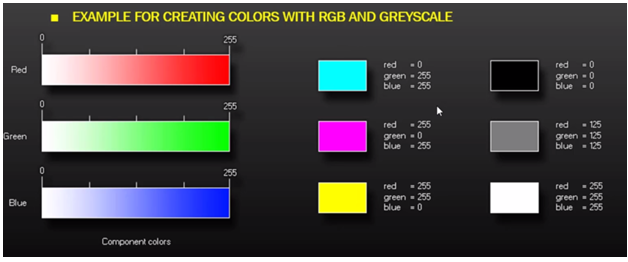

In [ ]:
!wget -O kaggle_flower_images.zip https://www.dropbox.com/scl/fi/mxv5o39ekf6bgshz0g5jf/kaggle_flower_images.zip?rlkey=90gi41kzonieowglmbw75yop3&st=ynk3dv7h&dl=1
!unzip -q kaggle_flower_images.zip

--2025-05-20 23:42:32--  https://www.dropbox.com/scl/fi/mxv5o39ekf6bgshz0g5jf/kaggle_flower_images.zip?rlkey=90gi41kzonieowglmbw75yop3
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf4fc8afa719278f7fe9cf1cec.dl.dropboxusercontent.com/cd/0/inline/CqG0ORQI7lhGZt9Ka6noOvbVW13hOqaNErKO0vrfTA2ztFtmRaFS86H0eK4oqUb63xpGw9zl3soIgnkU_2gwM0YinHLDb74rzxLRWsCTfnV1cfjPfODzjz3_AMp6Y7L9Yeh388s4Q_TyBJEv6ERSZLyp/file# [following]
--2025-05-20 23:42:33--  https://ucaf4fc8afa719278f7fe9cf1cec.dl.dropboxusercontent.com/cd/0/inline/CqG0ORQI7lhGZt9Ka6noOvbVW13hOqaNErKO0vrfTA2ztFtmRaFS86H0eK4oqUb63xpGw9zl3soIgnkU_2gwM0YinHLDb74rzxLRWsCTfnV1cfjPfODzjz3_AMp6Y7L9Yeh388s4Q_TyBJEv6ERSZLyp/file
Resolving ucaf4fc8afa719278f7fe9cf1cec.dl.dropboxusercontent.com (ucaf4fc8afa719278f7fe9cf1cec.dl.dropboxusercontent.com)... 162.125.

In [ ]:
image_path = "kaggle_flower_images"
path = sorted([os.path.join(image_path, file)
for file in os.listdir(image_path )
if file.endswith('.png')])

print(len(path))
print(path[0])

210
kaggle_flower_images/0001.png


In [ ]:
path

['kaggle_flower_images/0001.png',
 'kaggle_flower_images/0002.png',
 'kaggle_flower_images/0003.png',
 'kaggle_flower_images/0004.png',
 'kaggle_flower_images/0005.png',
 'kaggle_flower_images/0006.png',
 'kaggle_flower_images/0007.png',
 'kaggle_flower_images/0008.png',
 'kaggle_flower_images/0009.png',
 'kaggle_flower_images/0010.png',
 'kaggle_flower_images/0011.png',
 'kaggle_flower_images/0012.png',
 'kaggle_flower_images/0013.png',
 'kaggle_flower_images/0014.png',
 'kaggle_flower_images/0015.png',
 'kaggle_flower_images/0016.png',
 'kaggle_flower_images/0017.png',
 'kaggle_flower_images/0018.png',
 'kaggle_flower_images/0019.png',
 'kaggle_flower_images/0020.png',
 'kaggle_flower_images/0021.png',
 'kaggle_flower_images/0022.png',
 'kaggle_flower_images/0023.png',
 'kaggle_flower_images/0024.png',
 'kaggle_flower_images/0025.png',
 'kaggle_flower_images/0026.png',
 'kaggle_flower_images/0027.png',
 'kaggle_flower_images/0028.png',
 'kaggle_flower_images/0029.png',
 'kaggle_flowe

Recupero archivo labels

In [ ]:
image_path = "kaggle_flower_images"
pathLabel = sorted([os.path.join(image_path, file)
for file in os.listdir(image_path )
if file.endswith('.csv')])

print(len(pathLabel))
print(pathLabel[0])

1
kaggle_flower_images/flower_labels.csv


Carguemos la imagen en escala de grises

In [ ]:
img=cv2.imread(path[0],cv2.IMREAD_GRAYSCALE)
imgTira=img.flatten()
print('El tamaño del dato es ', img.shape)
print('El tamaño del dato en formato tira es ', imgTira.shape)

El tamaño del dato es  (128, 128)
El tamaño del dato en formato tira es  (16384,)


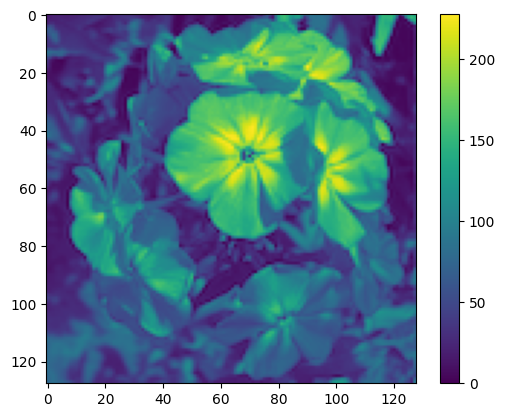

In [ ]:
# VISUALICEMOS LA IMAGEN SIN ESPECIFICAR COLORMAP
plt.imshow(img)
plt.colorbar()


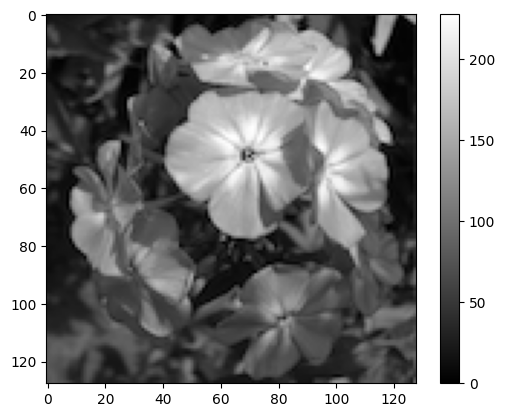

In [ ]:
# ESPECIFIQUEMOS EL COLORMAP DE GRISES
plt.imshow(img,cmap='gray')
plt.colorbar()


Ahora cargémosla en colores

In [ ]:
img=cv2.imread(path[0],cv2.IMREAD_COLOR)
imgTira=img.flatten()
print('El tamaño del dato es ', img.shape)
print('El tamaño del dato en formato tira es ', imgTira.shape)

El tamaño del dato es  (128, 128, 3)
El tamaño del dato en formato tira es  (49152,)


ATENCION:

La librería CV2 asume un orden de canales BGR (azul, verde, rojo) en vez del tradicional RGB.

Así que las imágenes cargadas con la función *imread* de CV2 deben ser visualizadas con la función *imshow* de la librería CV2, ya que si usan la función *imshow* de matplotlib (que asume RGB) va a tomar los canales en el orden incorrecto (¡lo azul se verá como rojo y viceversa!)

Para complicar más las cosas, la función *cv2.imshow* no es compatible con Jupyter Notebooks (y por ende colabs)... Por lo que nos bajamos una función *cv2_imshow* que la substituye:

In [ ]:
# The cv2.imshow() and cv.imshow() functions from the opencv-python package are incompatible with Jupyter notebook;
# see https://github.com/jupyter/notebook/issues/3935.
# As a replacement, you can use the following function:
from google.colab.patches import cv2_imshow

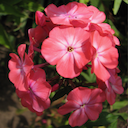

In [ ]:
cv2_imshow(img)

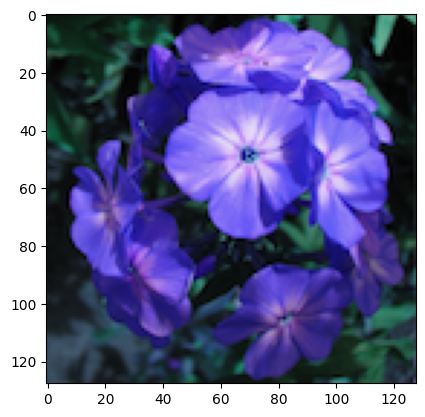

In [ ]:
### Cuidado con el orden de los canales
plt.imshow(img)

Si quiero usar la librería matplotlib tengo que intercambiar los canales rojo y azul:

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

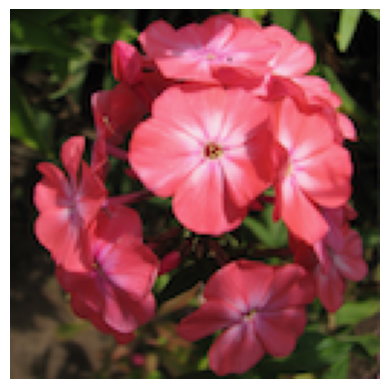

In [ ]:
rojo=img[:,:,2].copy()
azul=img[:,:,0].copy()

imgRGB=img.copy()
imgRGB[:,:,0]=rojo
imgRGB[:,:,2]=azul

plt.imshow(imgRGB)
plt.axis('off')

Veamos la contribución del canal rojo:

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

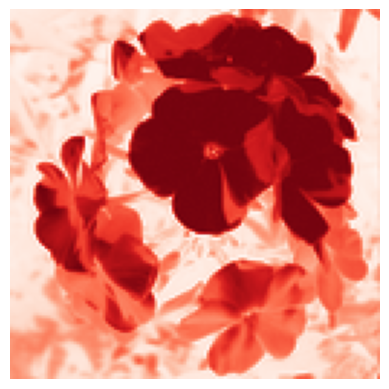

In [ ]:
imagenCanal = imgRGB[:,:,0]
plt.imshow(imagenCanal,cmap='Reds')
plt.axis('off')

La imagen se trata como un array. Puedo elegir qué parte mostrar

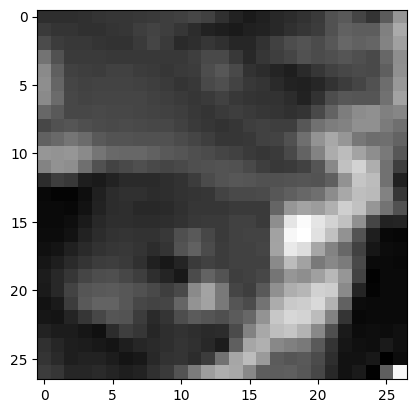

In [ ]:
# Puedo seleccionar una región de la imagen
img=cv2.imread(path[0],cv2.IMREAD_GRAYSCALE)
plt.imshow(img[3:30,3:30],cmap='gray')


Text(0.5, 0, 'pixel values')

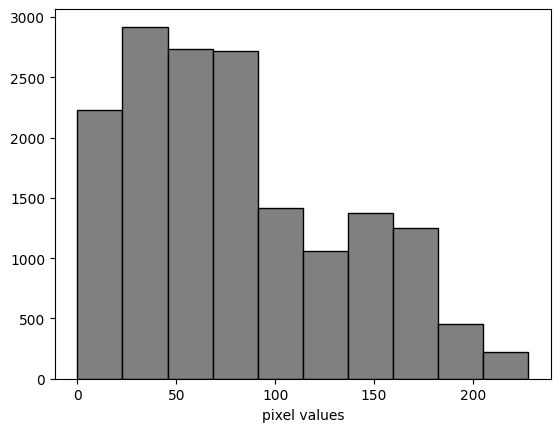

In [ ]:
# Una forma de caracterizar la imagen es ver cómo es la distribución de los pixels
plt.hist(img.flatten(),bins=10,color='gray',edgecolor='k')
plt.xlabel('pixel values')

Como cualquier matriz, la imagen se puede rotar o girar

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

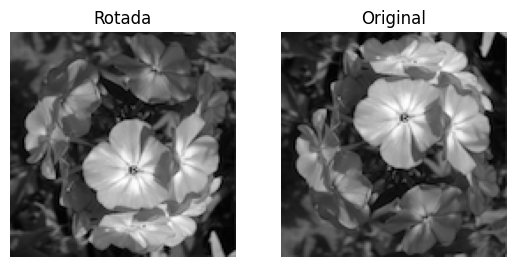

In [ ]:
imagen_rotada = np.flipud(img) #Reverse the order of elements along axis 0 (up/down).
plt.subplot(1,2,1)
plt.imshow(imagen_rotada,cmap='gray')
plt.title("Rotada")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title("Original")
plt.axis('off')

## Para suavizar una imagen o para reducir el ruido se usan filtros sobre las imágenes.

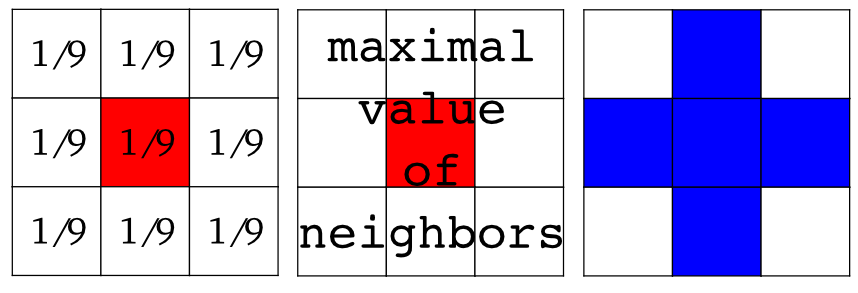


Text(0.5, 1.0, 'Filtrada')

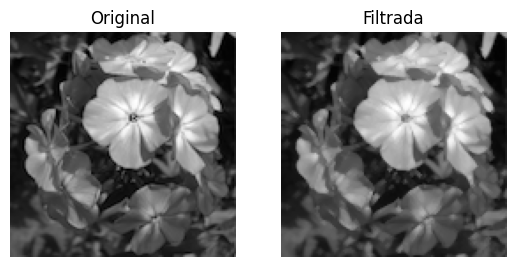

In [ ]:
from scipy.ndimage import median_filter
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html
imagen_filtrada = median_filter(img,size=2)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imagen_filtrada, cmap='gray')
plt.axis('off')
plt.title('Filtrada')

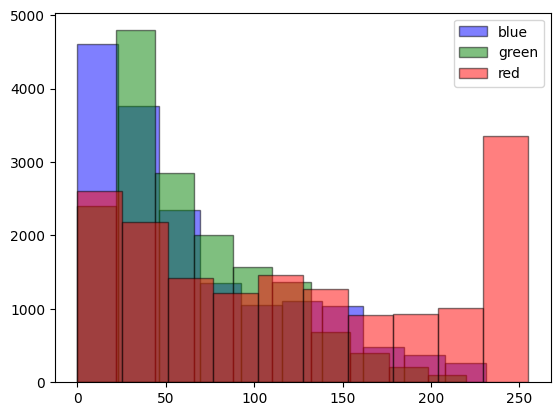

In [ ]:
# Ahora veamos un histograma de cada canal
img=cv2.imread(path[0],cv2.IMREAD_COLOR)
colores =['blue', 'green','red'] # formato BGR de cv2

for n,cs in enumerate(colores):
  monocol=img[:,:,n]
  plt.hist(monocol.flatten(),color=cs,bins=10,edgecolor='k',alpha=0.5,label=cs)
plt.legend()

Ahora una forma más prolija de hacerlo, usando la librería CV2:

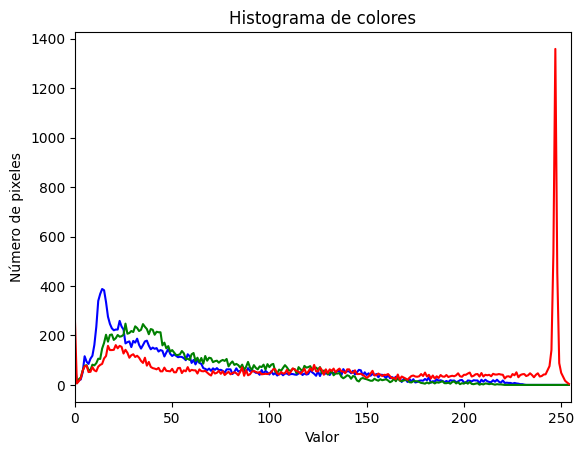

In [ ]:
img=cv2.imread(path[0],cv2.IMREAD_COLOR)
colores =['blue', 'green','red'] # formato BGR de cv2
channels = cv2.split(img)       # Separamos los canales

plt.figure()
plt.title("Histograma de colores")
plt.xlabel("Valor")
plt.ylabel("Número de pixeles")
for (i, col) in zip(channels, colores):       # Loop sobre canales
  hist = cv2.calcHist([i], [0], None, [255], [0, 255])   # histograma del canal, con límites de valores entre 0 y 255
  plt.plot(hist, color = col)      # Graficamos el histograma
  plt.xlim([0, 255])

### Exploremos el archivo labels

In [ ]:
labels = pd.read_csv(pathLabel[0])
print(labels)

         file  label
0    0001.png      0
1    0002.png      0
2    0003.png      2
3    0004.png      0
4    0005.png      0
..        ...    ...
205  0206.png      6
206  0207.png      0
207  0208.png      4
208  0209.png      6
209  0210.png      1

[210 rows x 2 columns]


In [ ]:
labels.values[:,1]

array([0, 0, 2, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 7, 7, 1, 0, 0, 6, 0, 2, 4,
       7, 4, 5, 6, 2, 5, 6, 6, 3, 6, 5, 0, 3, 8, 5, 9, 2, 8, 9, 1, 7, 3,
       1, 4, 7, 3, 8, 1, 3, 4, 7, 9, 3, 6, 5, 8, 6, 8, 2, 1, 7, 8, 0, 5,
       6, 3, 6, 4, 9, 7, 9, 1, 5, 3, 6, 6, 8, 3, 1, 4, 3, 9, 8, 5, 2, 4,
       6, 4, 7, 1, 5, 2, 1, 5, 8, 5, 8, 3, 1, 2, 4, 5, 1, 2, 8, 3, 8, 3,
       5, 4, 2, 9, 5, 0, 8, 6, 0, 8, 5, 2, 4, 5, 8, 3, 2, 0, 8, 6, 9, 2,
       8, 4, 5, 8, 0, 6, 2, 4, 9, 4, 5, 5, 2, 7, 8, 4, 9, 3, 2, 4, 7, 5,
       9, 3, 1, 8, 1, 3, 6, 9, 1, 2, 8, 2, 7, 9, 9, 5, 9, 8, 3, 9, 8, 5,
       1, 4, 2, 7, 0, 5, 8, 6, 3, 9, 6, 1, 3, 7, 4, 7, 1, 9, 8, 3, 6, 5,
       6, 4, 1, 3, 8, 5, 4, 6, 0, 4, 6, 1], dtype=object)

## Pongamos las imagenes en un data frame para poder analizarlo con técnicas de reducción de dimensionalidad

In [ ]:
df = pd.DataFrame()
for a in path:
  img=cv2.imread(a,cv2.IMREAD_COLOR)
  if img.shape == (128, 128, 3):
    # Poniendo solo los datos de cada imagen
    df = pd.concat([df, pd.DataFrame(img.flatten()).T], ignore_index=True)

  # Poniendo también el path a cada fila
  # tmp = pd.concat([pd.DataFrame([a]), pd.DataFrame(img).T], axis=1)
  # df = pd.concat([df, tmp], ignore_index=True)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,10,22,13,9,23,14,10,24,16,11,...,70,38,38,59,16,25,26,78,74,117
1,30,49,38,30,50,37,30,52,38,31,...,10,8,10,9,7,7,7,5,5,5
2,48,83,65,58,87,72,62,90,74,57,...,50,38,70,52,41,74,56,42,76,58
3,102,53,162,91,66,147,97,80,156,107,...,108,67,44,105,68,43,103,68,43,103
4,78,52,193,76,51,194,85,58,195,101,...,252,200,179,253,189,163,248,154,120,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,19,42,29,14,24,18,16,26,18,18,...,16,17,16,15,15,16,13,14,21,14
205,41,171,95,31,164,84,39,157,81,64,...,32,20,94,31,19,88,31,13,60,23
206,12,14,13,11,14,12,11,14,12,10,...,10,13,13,13,13,15,15,14,14,14
207,51,82,69,52,83,71,44,77,66,37,...,151,103,190,142,90,180,132,80,166,116


In [ ]:
pd.DataFrame(path)

,0
0,kaggle_flower_images/0001.png
1,kaggle_flower_images/0002.png
2,kaggle_flower_images/0003.png
3,kaggle_flower_images/0004.png
4,kaggle_flower_images/0005.png
...,...
205,kaggle_flower_images/0206.png
206,kaggle_flower_images/0207.png
207,kaggle_flower_images/0208.png
208,kaggle_flower_images/0209.png
